In [34]:
import pandas as pd

# загружаем данные в память
df = pd.read_csv("data/labeled.csv")

In [35]:
# просмотр содержимого
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [36]:
# для обработки берем колонку комментарии
comments = df['comment']

In [37]:
from keras.preprocessing.text import Tokenizer

# создаем единый словарь (слово -> число) для преобразования
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comments.tolist())

In [38]:
# Преобразуем все описания в числовые последовательности, заменяя слова на числа по словарю.
textSequences = tokenizer.texts_to_sequences(comments.tolist())

In [39]:
# Посчитаем максимальную длинну текста описания в словах
max_words = 0
for comment in comments:
    words = len(comment.split())
    if words > max_words:
        max_words = words
print('Максимальная длина описания: {} слов'.format(max_words))

Максимальная длина описания: 1078 слов


In [40]:
# выбор лейбл 1.0 плохой 0.0 норм комментарий
toxic_code = df['toxic']

In [41]:
# разобьем на сеты для обучения, тренировки и проверки.
def load_data_from_arrays(strings, labels, train_test_split=0.8):
    data_size = len(strings)
    test_size = int(data_size - round(data_size * train_test_split))
    print("Test size: {}".format(test_size))

    print("\nTraining set:")
    x_train = strings[test_size:]
    print("\t - x_train: {}".format(len(x_train)))
    y_train = labels[test_size:]
    print("\t - y_train: {}".format(len(y_train)))

    print("\nTesting set:")
    x_test = strings[:test_size]
    print("\t - x_test: {}".format(len(x_test)))
    y_test = labels[:test_size]
    print("\t - y_test: {}".format(len(y_test)))

    return x_train, y_train, x_test, y_test

In [42]:
# разобьем на сеты для обучения, тренировки и проверки.
X_train, y_train, X_test, y_test = load_data_from_arrays(textSequences, toxic_code, train_test_split=0.8)

Test size: 2882

Training set:
	 - x_train: 11530
	 - y_train: 11530

Testing set:
	 - x_test: 2882
	 - y_test: 2882


In [43]:
total_words = len(tokenizer.word_index)
print('В словаре {} слов'.format(total_words))

В словаре 68490 слов


In [44]:
num_words = 10_000

In [45]:
print(u'Преобразуем комменты в векторы чисел...')
tokenizer = Tokenizer(num_words=num_words)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print('Размерность X_train:', X_train.shape)
print('Размерность X_test:', X_test.shape)

Преобразуем комменты в векторы чисел...
Размерность X_train: (11530, 10000)
Размерность X_test: (2882, 10000)


In [46]:
import keras

print(u'Преобразуем категории в матрицу двоичных чисел (для использования categorical_crossentropy)')
num_classes = np.max(y_train) + 1.0

y_train = keras.utils.to_categorical(y_train, int(num_classes))
y_test = keras.utils.to_categorical(y_test, int(num_classes))
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Преобразуем категории в матрицу двоичных чисел (для использования categorical_crossentropy)
y_train shape: (11530, 2)
y_test shape: (2882, 2)


In [62]:
# количество эпох\итераций для обучения
epochs = 4
batch_size = 32
print('Собираем модель...')
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())

Собираем модель...
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 34        
Total params: 160,322
Trainable params: 160,322
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
print('Тренируем модель...')
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Тренируем модель...
Train on 11530 samples, validate on 2882 samples
Epoch 1/4
11530/11530 [==============================] - 4s 304us/step - loss: 0.4628 - accuracy: 0.7924 - val_loss: 0.7670 - val_accuracy: 0.6756
Epoch 2/4
11530/11530 [==============================] - 3s 274us/step - loss: 0.2924 - accuracy: 0.9008 - val_loss: 0.8578 - val_accuracy: 0.7160
Epoch 3/4
11530/11530 [==============================] - 3s 275us/step - loss: 0.2225 - accuracy: 0.9231 - val_loss: 1.0309 - val_accuracy: 0.7214
Epoch 4/4
11530/11530 [==============================] - 3s 277us/step - loss: 0.1833 - accuracy: 0.9374 - val_loss: 1.1507 - val_accuracy: 0.7274


In [64]:
score = model.evaluate(X_test, y_test, batch_size=32, verbose=1)

print('Оценка теста: {}'.format(score[0]))
print('Оценка точности модели: {}'.format(score[1]))

2882/2882 [==============================] - 0s 123us/step
Оценка теста: 1.1506899033545785
Оценка точности модели: 0.7274461984634399


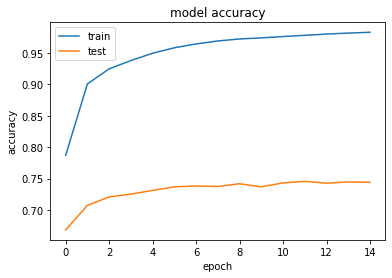

In [60]:
import matplotlib.pyplot as plt

# График точности модели
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

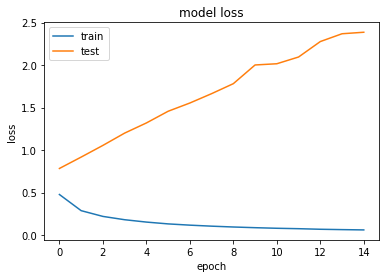

In [61]:
# График оценки loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()